# Self-drive car Kaggle Challenge

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
# for data processing
import nltk
import pandas as pd
import numpy as np
import gensim

In [5]:
# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [6]:
# For machine learning processing
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV

In [7]:
# For models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [8]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('cleaned_sentiment_self_cars.csv', encoding= 'utf-8')
data.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6892,Positive
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...,0.9157,Positive
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive


In [9]:
data.columns

Index(['sentiment', 'text', 'cleaned', 'Sent_compound_Polarity', 'Sent_type'], dtype='object')

In [10]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(981, 5)


In [11]:
data_test = pd.read_csv('test.csv')

In [12]:
data_test.shape

(979, 2)

In [13]:
data_test.head()

,id,text
0,1,Two places I'd invest all my money if I could:...
1,2,Awesome! Google driverless cars will help the ...
2,3,Autonomous vehicles could reduce traffic fatal...
3,4,Really good presentation from Jan Becker on Bo...
4,5,Ford just revealed it's Automated Ford Fusion ...


## In-balance data-points

**We can see that train has 981 data-points and test has 979. To balance this, we will remove last two values of train-set<br>
Let's check if there are any duplicate tweets in our train dataset**

In [14]:
print(data.text.duplicated())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
951    False
952    False
953    False
954    False
955    False
956    False
957    False
958    False
959    False
960    False
961    False
962    False
963    False
964    False
965    False
966    False
967    False
968    False
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
Name: text, Length: 981, dtype: bool


**It seems that there are no duplicate values. We have not seen all. To check in detail, sum them all**

In [15]:
print(data.text.duplicated().sum())

0


In [16]:
# Lets check whole dataset
print(data.duplicated().sum())

0


In [17]:
# To check exact location by row
data.loc[data.duplicated() , :]

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type


Confirmed, there is no duplicate text in our dataset. Now, we choose at random two points to balance it

In [18]:
data.drop([3,63], axis=0, inplace= True)
# For rows, axis=0, inplace will make change without storing 

In [19]:
data.shape

(979, 5)

**Now we have 979 data points. Let's see more of data**

In [20]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)

Datatype of each column:
sentiment                   int64
text                       object
cleaned                    object
Sent_compound_Polarity    float64
Sent_type                  object
dtype: object


In [21]:
# DATASET SUMMARY
data.describe(include='all')

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type
count,979.00000,979,979,979.000000,979
unique,NaN,979,976,NaN,3
top,NaN,"""@BrookingsInst: When driverless cars crash, w...",driverless car jevon paradox http co omjjji,NaN,Neutral
freq,NaN,1,2,NaN,405
mean,3.13381,NaN,NaN,0.059077,NaN
std,0.78422,NaN,NaN,0.356868,NaN
min,1.00000,NaN,NaN,-0.938000,NaN
25%,3.00000,NaN,NaN,0.000000,NaN
50%,3.00000,NaN,NaN,0.000000,NaN
75%,3.00000,NaN,NaN,0.318200,NaN


In [22]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type,length
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive,140
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive,31
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6892,Positive,72
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive,73
5,5,You could call a driverless car and tell the c...,could call driverless car tell car take whoo hoo,0.0000,Neutral,84


## Visualization

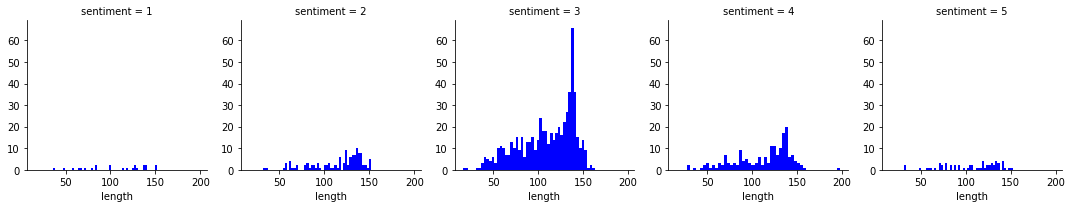

In [23]:
# COMPARING TEXT LENGTH TO Sentiments
graph = sns.FacetGrid(data=data,col='sentiment')
graph.map(plt.hist,'length',bins=50,color='blue')

**We have got a smaller dataset. Better way is to do sentiment analysis. See what are positive , negative and neutral emotions and then rank them accordingly**

# Creating key features for modeling

In [26]:
train=data['cleaned']

In [27]:
test=data_test['text']

In [28]:
data['sent_numeric'] = data.Sent_type.map({'Negative':0, 'Positive':1, 'Neutral':2})

In [29]:
data.head()

,sentiment,text,cleaned,Sent_compound_Polarity,Sent_type,length,sent_numeric
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...,0.5106,Positive,140,1
1,5,I want a Google driverless car.,want google driverless car,0.0772,Positive,31,1
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...,0.6892,Positive,72,1
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...,0.6249,Positive,73,1
5,5,You could call a driverless car and tell the c...,could call driverless car tell car take whoo hoo,0.0000,Neutral,84,2


In [30]:
y=data.sent_numeric

In [31]:
type(y)

pandas.core.series.Series

In [32]:
y.value_counts()

2    405
1    360
0    214
Name: sent_numeric, dtype: int64

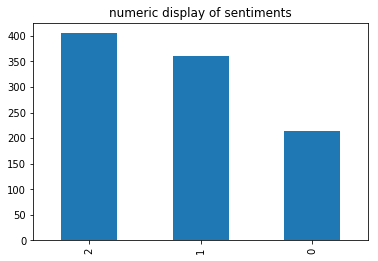

In [33]:
y.value_counts().plot (kind='bar' , title="numeric display of sentiments")

# Vectorize

In [34]:
# instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(train)
train_dtm = vect.transform(train)

In [35]:
type(train_dtm)

scipy.sparse.csr.csr_matrix

In [36]:
train_dtm

<979x3752 sparse matrix of type '<class 'numpy.int64'>'
	with 11378 stored elements in Compressed Sparse Row format>

In [37]:
target=data['sentiment']
target[:3]

0    5
1    5
2    5
Name: sentiment, dtype: int64

In [38]:
target.shape

(979,)

In [39]:
test=data_test['text']

In [40]:
test.shape

(979,)

In [41]:
# for our test set
test_dtm = vect.transform(test)
test_dtm

<979x3752 sparse matrix of type '<class 'numpy.int64'>'
	with 7297 stored elements in Compressed Sparse Row format>

**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data (and **ignores tokens** it hasn't seen before)

# Modeling

## 0- Null Accuracy

In [42]:
y.value_counts().head(1) / len(y)

2    0.413687
Name: sent_numeric, dtype: float64

## i-Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(train_dtm,y)
predictions_LR = lr.predict(test_dtm)

In [44]:
acc_LR = round(lr.score(train_dtm, y) * 100, 2)
acc_LR

99.49

In [45]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y,predictions_LR))

Confusion Matrix for Logistic Regression:
[[ 15  80 119]
 [ 16 149 195]
 [ 17 146 242]]


In [46]:
print("Classification Report:\n",classification_report(y,predictions_LR))

Classification Report:
              precision    recall  f1-score   support

          0       0.31      0.07      0.11       214
          1       0.40      0.41      0.41       360
          2       0.44      0.60      0.50       405

avg / total       0.39      0.41      0.38       979



## ii-Naive Bayes

In [47]:
mnb = MultinomialNB()
mnb.fit(train_dtm,y)
predmnb = mnb.predict(test_dtm)

In [48]:
acc_NB = round(mnb.score(train_dtm, y) * 100, 2)
acc_NB

96.42

In [49]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 22 115  77]
 [ 21 184 155]
 [ 32 186 187]]


In [50]:
print("Classification Report:\n",classification_report(y,predmnb))

Classification Report:
              precision    recall  f1-score   support

          0       0.29      0.10      0.15       214
          1       0.38      0.51      0.44       360
          2       0.45      0.46      0.45       405

avg / total       0.39      0.40      0.38       979



## iii-SVM

In [51]:
svm = SVC()
svm.fit(train_dtm,y)
predsvm = svm.predict(test_dtm)

In [52]:
acc_SVM = round(svm.score(train_dtm, y) * 100, 2)
acc_SVM

41.37

In [53]:
print("Confusion Matrix for Support Vector:")
print(confusion_matrix(y,predsvm))

Confusion Matrix for Support Vector:
[[  0   0 214]
 [  0   0 360]
 [  0   0 405]]


In [54]:
print("Classification Report:\n",classification_report(y,predsvm))

Classification Report:
              precision    recall  f1-score   support

          0       0.00      0.00      0.00       214
          1       0.00      0.00      0.00       360
          2       0.41      1.00      0.59       405

avg / total       0.17      0.41      0.24       979



## iv-KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_dtm,y)
predknn = knn.predict(test_dtm)

In [56]:
acc_KNN = round(knn.score(train_dtm, y) * 100, 2)
acc_KNN

44.54

In [57]:
print("Confusion Matrix for KNN:")
print(confusion_matrix(y,predknn))

Confusion Matrix for KNN:
[[  0   0 214]
 [  0   0 360]
 [  0   0 405]]


In [58]:
print("Classification Report:\n",classification_report(y,predknn))

Classification Report:
              precision    recall  f1-score   support

          0       0.00      0.00      0.00       214
          1       0.00      0.00      0.00       360
          2       0.41      1.00      0.59       405

avg / total       0.17      0.41      0.24       979



**Our results seem in-consistent. We might need to work in 2nd attempt. Reason of this file is to show what our results at first attempt. In next attempt, we hopefully get better results**